In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 

In [2]:
os.chdir(r"C:\Users\ACER\Downloads\PYTHAN\Datasets-main\Datasets-main")

In [3]:
df=pd.read_csv("titanic-training-data.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

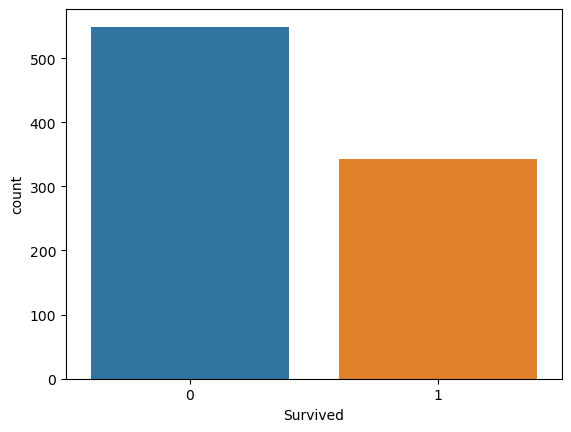

In [7]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

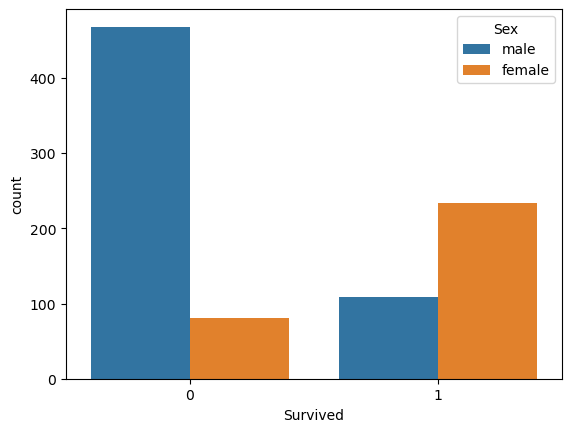

In [8]:
sns.countplot(x="Survived",hue="Sex",data=df)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Fare",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

In [12]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [14]:
df['Pclass'].value_counts()/len(df)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["Pclass"]):
    strat_train_set=df.iloc[train_index]
    strat_test_set=df.iloc[test_index]

In [16]:
df=strat_train_set.drop("Survived",axis=1)
df_labels=strat_train_set["Survived"].copy()

In [17]:
strat_train_set["Pclass"].value_counts()/len(strat_train_set)

3    0.550562
1    0.242978
2    0.206461
Name: Pclass, dtype: float64

In [18]:
strat_test_set["Pclass"].value_counts()/len(strat_test_set)

3    0.553073
1    0.240223
2    0.206704
Name: Pclass, dtype: float64

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
data_cat_1hot=cat_encoder.fit_transform(df)
data_cat_1hot.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([435.5,   3. ,  28. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,
         1. ])

In [22]:
x=imputer.transform(df)
titanic_tr=pd.DataFrame(x,columns=df.columns)

In [23]:
titanic_tr.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,439.962079,2.307584,29.091292,0.526685,0.386236,0.351124,0.648876,0.203652,0.087079,0.706461
std,258.206494,0.836609,12.966057,1.074898,0.808521,0.477657,0.477657,0.402996,0.282148,0.455703
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.750000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.500000,3.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,661.250000,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=DecisionTreeRegressor()
#model=LogisticRegression()
#model=LinearRegression()
model.fit(titanic_tr,df_labels)

RandomForestRegressor()

In [26]:
sample_data=df.iloc[:5]
sample_lable=df_labels.iloc[:5]
prepared_data=my_pipeline.fit_transform(sample_data)

In [27]:
model.predict(prepared_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.33, 0.65, 0.65, 0.66, 0.65])

In [28]:
df_labels

820    1
439    0
821    1
403    0
343    0
      ..
13     0
789    0
51     0
625    0
144    0
Name: Survived, Length: 712, dtype: int64

In [29]:
from sklearn.metrics import mean_squared_error
titanic_prediction=model.predict(titanic_tr)

In [30]:
lin_mse=mean_squared_error(df_labels,titanic_prediction)
lin_rmse=np.sqrt(lin_mse)

In [31]:
lin_rmse

0.14696986238490597

In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,titanic_tr,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-score)

In [33]:
def print_scores(score):
    print('scores:',score)
    print("mean:",score.mean())
    print("Standard Deviation:",score.std())

    

In [34]:
print_scores(rmse_scores)

scores: [0.39014598 0.41136291 0.35571194 0.34453684 0.35569412 0.31803534
 0.43083607 0.42145456 0.42945921 0.41498515]
mean: 0.3872222128550677
Standard Deviation: 0.03849138838241419


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,
                        scoring='neg_mean_squared_error',
                        return_train_score=True,
                        cv=10
                        )
grid_search.fit(titanic_tr,df_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
feature_importances=grid_search.best_estimator_.feature_importances_

numerics=['float64','int64']
num_attrs=list(df.select_dtypes(include=numerics))

attrs=num_attrs
sorted(zip(attrs,feature_importances),reverse=True)

[('SibSp', 0.05952591490370064),
 ('Pclass', 0.10189569032518705),
 ('PassengerId', 0.2574129082614029),
 ('Parch', 0.044101328048227216),
 ('Age', 0.20854327675399348)]

In [45]:
model1=RandomForestRegressor()

In [46]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
forest_params=[
    {'max_depth':list(range(10,15))},
    {'max_features':list(range(0,14))},
]
model2=GridSearchCV(model1,forest_params,cv=10,scoring='accuracy')
model2.fit(titanic_tr,df_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14]},
                         {'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')